# Week 8

### Quiz

1. What function is used to plot an array as a color grid?

2. Write a function that creates an $ n \times n $ array of 0s with a percentage of $ p $ randomly dispersed 1s.

3. In the below command, explain what the interval parameter is.

`anim = FuncAnimation(fig=fig, func=animate,  interval=300, blit=True, repeat=False)`

4. Identify and correct the error below.

In [1]:
import numpy as np
arr = np.zeros((10,10))
arr[3:7,3:7] = np.ones((5,5))

ValueError: could not broadcast input array from shape (5,5) into shape (4,4)

#### Answers:

1. `plt.imshow(arr)`

In [1]:
import random
import numpy as np
def random_ones(n,p):
    arr = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if random.random() < p:
                arr[i,j] = 1
    return arr

<IPython.core.display.Javascript object>


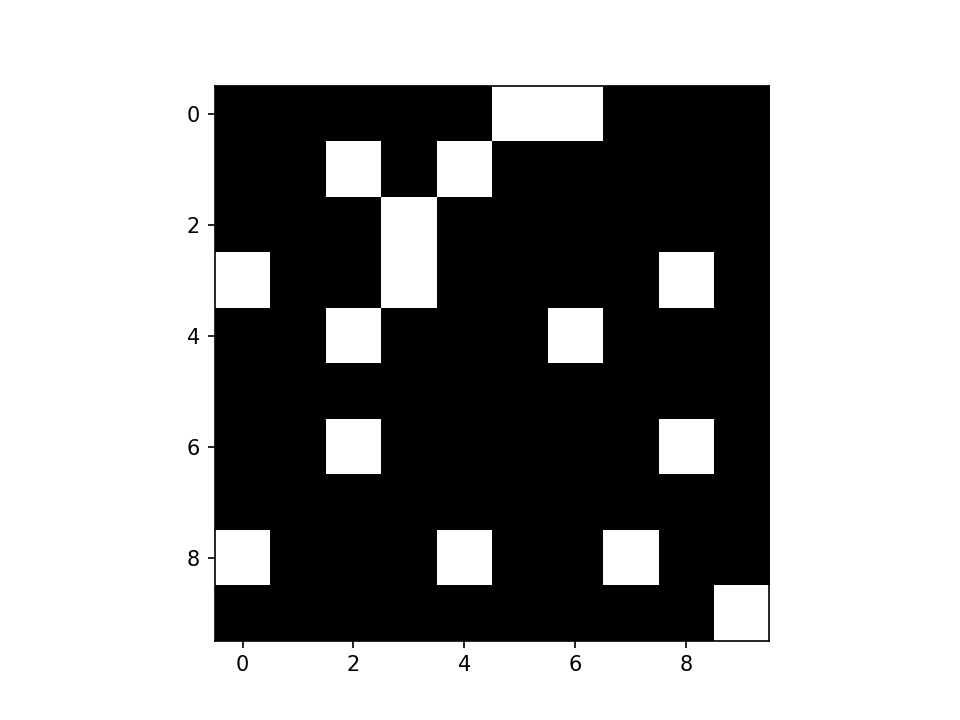

In [8]:
import matplotlib.pyplot as plt
plt.imshow(random_ones(10,0.2),cmap='gray')

In [2]:
def random_ones2(n,p):
    arr = np.random.random((n,n))
    arr = arr + p
    return np.array(arr,dtype = int)

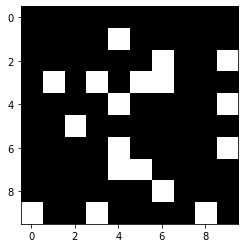

In [17]:
plt.imshow(random_ones2(10,0.2),cmap='gray')

3. The interval parameter is the lag time between frames of the animation in milliseconds.
4. We are trying to fit a 5x5 block of ones into a 4x4 subsection of the array.  We can either expand the subsection of the array or we can reduce the size of the block of ones.

### Notes

From last week's notes.

In [3]:
"""
arr is an m by n array of numbers
entry is the location (i,j)
"""
def neighbor_sum(arr,entry):
    m,n = np.shape(arr)
    padd = np.zeros((m+1,n+1),dtype=int)
    padd[1:,1:] = arr
    i,j = entry
    square = padd[i:i+3,j:j+3]
    summ = np.sum(square) - arr[i,j]
    return summ

Let's rewrite the update function with the rules for Life.

In [4]:
"""
arr is an m by n array of integers between 0 and k
k is the modulus for the sum
"""
def update(arr):
    m,n = np.shape(arr)
    new_arr = np.zeros((m,n),dtype=int)
    for i in range(m):
        for j in range(n):
            if arr[i,j] == 0:
                if neighbor_sum(arr,(i,j)) == 3:
                    new_arr[i,j] = 1
                else:
                    new_arr[i,j] = 0
            else:
                if neighbor_sum(arr,(i,j)) > 3 or neighbor_sum(arr,(i,j)) < 2:
                    new_arr[i,j] = 0
                else:
                    new_arr[i,j] = 1
    return new_arr

In [5]:
%matplotlib notebook

In [6]:
from matplotlib.animation import FuncAnimation

<IPython.core.display.Javascript object>


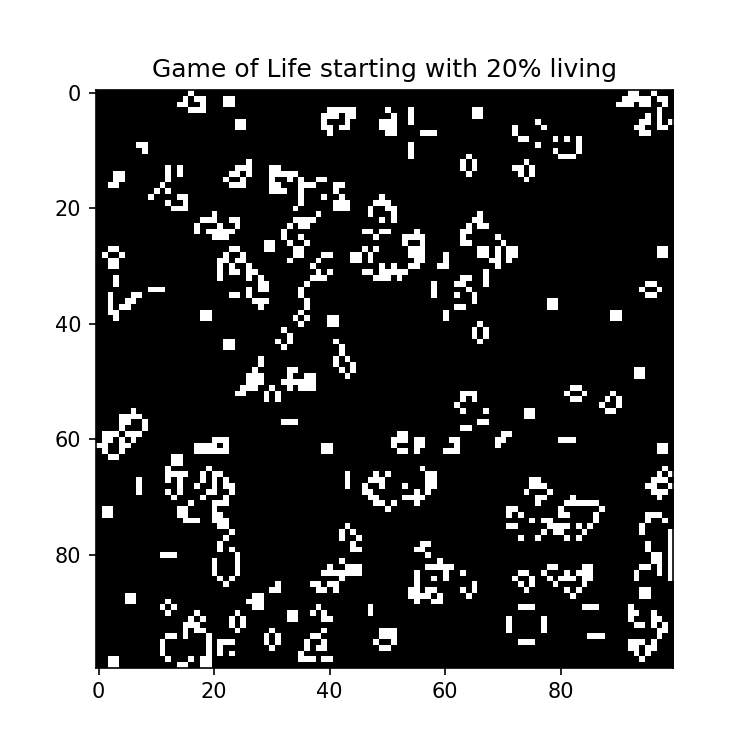

In [10]:
x = random_ones2(100,0.2)  # Initial configuration of the array

fig = plt.figure(figsize = (5,5))
ax = plt.subplot(111)
plt.title("Game of Life starting with 20% living")
#cmap = colors.ListedColormap(['palegreen', 'green', 'orange', 'black'])
im = ax.imshow(x, cmap = 'gray', vmin=0, vmax=1)


def animate(i):
    global x

    x=update(x)
    im.set_data(x)
    return im


anim = FuncAnimation(fig=fig, func=animate,  interval=100, blit=True, repeat=False)
plt.show()

#### np.roll

In [11]:
arr = np.zeros((5,5),dtype=int)
arr[1:4,1:4] = 1
arr

array([[0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0]])

In [13]:
np.roll(arr,2,0)

array([[0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0]])

In [40]:
np.roll(arr,(1,-1),(0,1))

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0]])

In [15]:
roll_sum = (np.roll(arr,(-1,-1),(0,1)) + np.roll(arr,(0,-1),(0,1)) + np.roll(arr,(1,-1),(0,1)) 
            + np.roll(arr,(-1,0),(0,1)) + np.roll(arr,(0,0),(0,1)) + np.roll(arr,(1,0),(0,1))
            + np.roll(arr,(-1,1),(0,1)) + np.roll(arr,(0,1),(0,1)) + np.roll(arr,(1,1),(0,1)) - arr)
roll_sum

array([[1, 2, 3, 2, 1],
       [2, 3, 5, 3, 2],
       [3, 5, 8, 5, 3],
       [2, 3, 5, 3, 2],
       [1, 2, 3, 2, 1]])

In [16]:
neighbor_sums = roll_sum[1:4,1:4]
neighbor_sums

array([[3, 5, 3],
       [5, 8, 5],
       [3, 5, 3]])

In [17]:
def neighbor_sum_array(arr,k):
    m,n = np.shape(arr)
    padd = np.zeros((m+2,n+2))
    padd[1:m+1,1:n+1] = arr
    roll_sum = -1*padd
    for i,j in [(i,j) for i in range(-1,2) for j in range(-1,2)]:
        roll_sum += np.roll(padd,(i,j),(0,1))
    neighbor_sum = roll_sum[1:m+1,1:n+1]
    return neighbor_sum%k

In [19]:
neighbor_sum_array(arr,3)

array([[1., 2., 0., 2., 1.],
       [2., 0., 2., 0., 2.],
       [0., 2., 2., 2., 0.],
       [2., 0., 2., 0., 2.],
       [1., 2., 0., 2., 1.]])